In [1]:
library(tidyverse)
library(cluster)
library(gridExtra)


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
set.seed(1)


In [3]:
happiness <- read_csv("/home/asus/content/Notes/Semester 4/FDN Lab/Experiments/Experiment 6/archive(11)/2019.csv")



Rows: 156 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Country
dbl (8): Overall rank, Score, GDP per capita, Social support, Healthy life e...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
numeric_data <- happiness %>%
  select(
  "Overall rank", "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"
    ) %>%
  scale()


In [5]:
rownames(numeric_data) <- happiness$`Country`


In [6]:
wcss <- map_dbl(1:10, ~ kmeans(numeric_data, ., nstart = 25)$tot.withinss)

In [7]:
avg_sil <- map_dbl(2:10, ~ {
  km <- kmeans(numeric_data, ., nstart = 25)
  silhouette_score <- silhouette(km$cluster, dist(numeric_data))
  mean(silhouette_score[, 3])
})


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


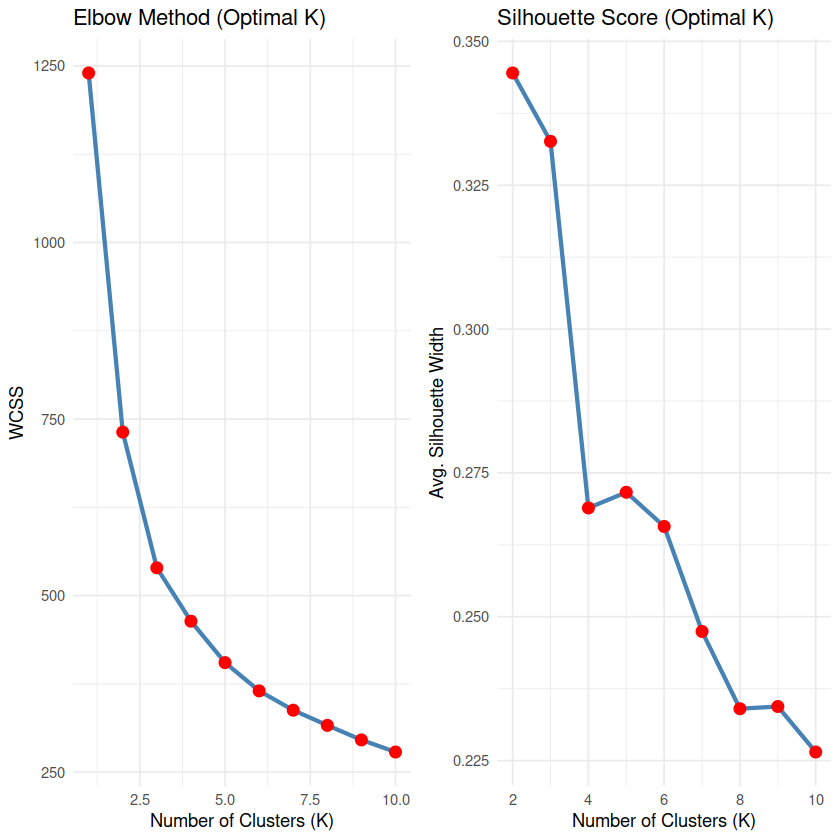

In [8]:
elbow_plot <- ggplot(data.frame(K = 1:10, WCSS = wcss), aes(K, WCSS)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "red", size = 3) +
  labs(title = "Elbow Method (Optimal K)", x = "Number of Clusters (K)", y = "WCSS") +
  theme_minimal()

silhouette_plot <- ggplot(data.frame(K = 2:10, Silhouette = avg_sil), aes(K, Silhouette)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "red", size = 3) +
  labs(title = "Silhouette Score (Optimal K)", x = "Number of Clusters (K)", y = "Avg. Silhouette Width") +
  theme_minimal()

grid.arrange(elbow_plot, silhouette_plot, ncol = 2)

In [9]:
k2 <- kmeans(numeric_data, centers = 2, nstart = 25)
k3 <- kmeans(numeric_data, centers = 3, nstart = 25)
k4 <- kmeans(numeric_data, centers = 4, nstart = 25)
k5 <- kmeans(numeric_data, centers = 5, nstart = 25)


In [10]:
happiness$Cluster_K2 <- as.factor(k2$cluster)
happiness$Cluster_K3 <- as.factor(k3$cluster)
happiness$Cluster_K4 <- as.factor(k4$cluster)
happiness$Cluster_K5 <- as.factor(k5$cluster)



In [11]:
plot_cluster_means <- function(km_result, title) {
  centers <- as.data.frame(km_result$centers)
  centers$Cluster <- factor(rownames(centers))

  centers_long <- centers %>%
    pivot_longer(cols = -Cluster, names_to = "Feature", values_to = "Mean_Value")

  ggplot(centers_long, aes(x = Feature, y = Mean_Value, fill = Cluster)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = title, y = "Standardized Mean Value", x = "") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_brewer(palette = "Set1")
}


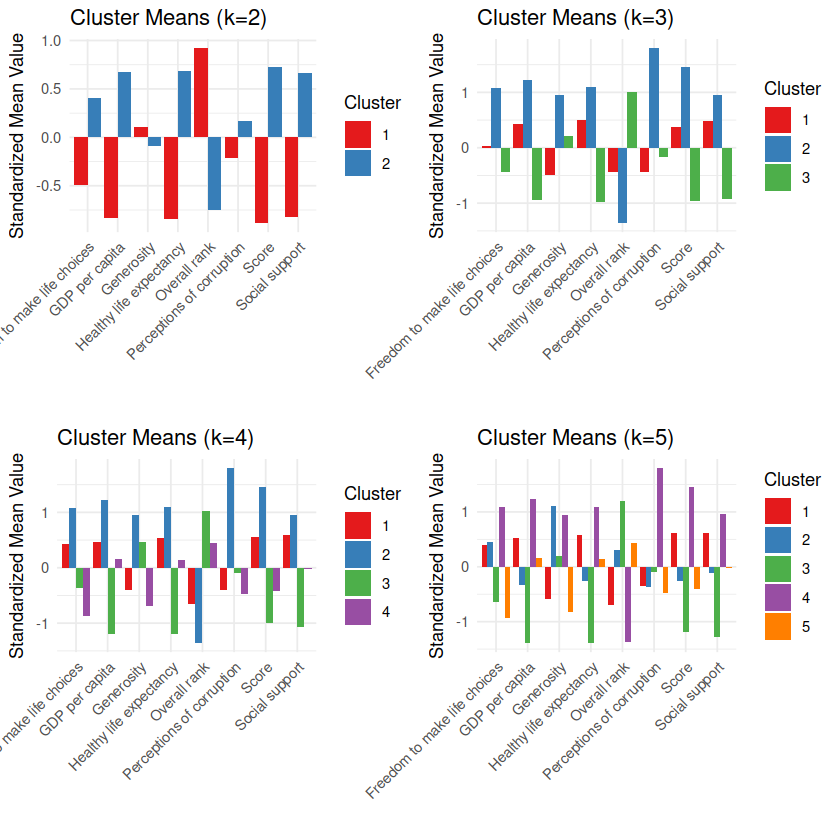

In [12]:
p2 <- plot_cluster_means(k2, "Cluster Means (k=2)")
p3 <- plot_cluster_means(k3, "Cluster Means (k=3)")
p4 <- plot_cluster_means(k4, "Cluster Means (k=4)")
p5 <- plot_cluster_means(k5, "Cluster Means (k=5)")

grid.arrange(p2, p3, p4, p5, ncol = 2)